# Project mnist hard writing

data souce : Kaggle
Link : https://www.kaggle.com/c/digit-recognizer

2023/01/20
2238i

lets get init

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
##IDK what is wrong with that up cell
import torch
import subprocess

def GPU():
    if torch.cuda.is_available() == True:
        device = 'cuda'
        templist = [1, 2, 3]
        templist = torch.FloatTensor(templist).to(device)
        print("Cuda torch working : ", end="")
        print(templist.is_cuda)
        print("current device no. : ", end="")
        print(torch.cuda.current_device())
        print("GPU device count : ", end="")
        print(torch.cuda.device_count())
        print("GPU name : ", end="")
        print(torch.cuda.get_device_name(0))
        print("device : ", device)
        # Execute the nvidia-smi command using subprocess
        try:
            output = subprocess.check_output(['nvidia-smi']).decode('utf-8')
            print("nvidia-smi output:")
            print(output)
        except (subprocess.CalledProcessError, FileNotFoundError) as e:
            print("Error executing nvidia-smi command:", str(e))
    elif torch.backends.mps.is_available() == True:
        print("Apple device detected\nActivating Apple Silicon GPU")
        device = torch.device("mps")
    else:
        print("cant use gpu , activating cpu")
        device = 'cpu'

    return device
device = GPU()
print(device)

cant use gpu , activating cpu
cpu


In [3]:
import csv
import numpy as np
import torch

try:
  f =  open("train.csv")
except:
  f = open("/kaggle/input/digit-recognizer/train.csv")
read = csv.reader(f)

#data to list
data = []
for row in read:
  data.append(row)

#delete legend data
del data[0]

#get num data
data = np.float_(data)
data = np.array(data)
y_train_numbers_origianl = data[:,0:1]
y_train_numbers  = [[0 for col in range(10)] for row in range(len(y_train_numbers_origianl))]
#print(y_train_numbers)
for row in range(len(y_train_numbers_origianl)):
  y_train_numbers[row][int(y_train_numbers_origianl[row][0])] = 1
#print((y_train_numbers))

#get pixel data
x_train_data = data[:,1:]
#print(x_train_data)

f.close()

##TENSOR
x_train_data = torch.Tensor(x_train_data).to(device)
y_train_numbers = torch.Tensor(y_train_numbers).to(device)
print(x_train_data.type())
print(x_train_data.size())
print(y_train_numbers.size())

torch.FloatTensor
torch.Size([42000, 784])
torch.Size([42000, 10])


## ML

In [4]:
import torch



#lr_list = [1,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]
lr_list = [1e-4]
nb_epoch = 100000



for LR in lr_list:
  
  W = torch.zeros( [784,10] , requires_grad=True,device=device)
  b = torch.zeros( 10 , requires_grad=True,device=device)
  optimizer = torch.optim.SGD([W,b],lr=LR)
  loss = torch.nn.BCELoss()
  for epoch in range(nb_epoch+1):
    
    hypothesis = torch.nn.functional.softmax(torch.matmul(x_train_data,W) + b,dim=1)
    cost = loss(hypothesis,y_train_numbers)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
  print("LR : %.E cost : %.5f"%(LR,cost.item()))


LR : 1E-04 cost : 0.04401


#  Learning rate
LR : 1E+00 cost : 18.02737
LR : 1E-01 cost : 18.06524
LR : 1E-02 cost : 18.06333
LR : 1E-03 cost : 17.90429
### LR : 1E-04 cost : 0.04401
LR : 1E-05 cost : 0.05749
LR : 1E-06 cost : 0.10377
LR : 1E-07 cost : 0.25261
LR : 1E-08 cost : 0.31652

### Accuray : 94

In [5]:
#Test
hypothesis_num = torch.argmax(hypothesis,dim=1) #argmax returns the INDEX #dim = 0 means max in column // dim = 1 means max in row
accurcay = hypothesis_num.unsqueeze(1).tolist() == y_train_numbers_origianl
acc_in_percent = accurcay.sum().item()/len(y_train_numbers_origianl)*100
print(accurcay)
print(acc_in_percent)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
92.95


## Show Wrong Images

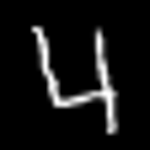

Row num : 3 // Num : 4 Hypothesis : 2


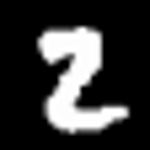

Row num : 16 // Num : 2 Hypothesis : 8


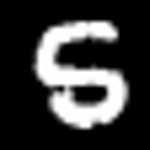

Row num : 19 // Num : 5 Hypothesis : 6


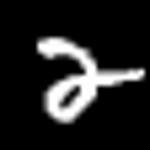

Row num : 34 // Num : 2 Hypothesis : 6


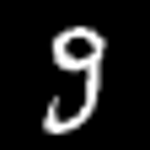

Row num : 40 // Num : 9 Hypothesis : 3


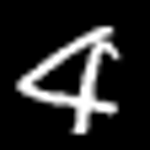

Row num : 43 // Num : 4 Hypothesis : 9


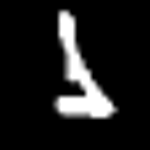

Row num : 60 // Num : 1 Hypothesis : 6


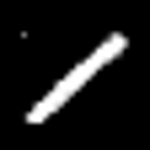

Row num : 61 // Num : 1 Hypothesis : 8


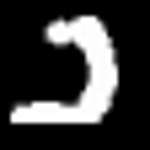

Row num : 73 // Num : 2 Hypothesis : 3


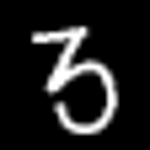

Row num : 90 // Num : 3 Hypothesis : 5


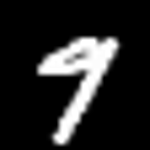

Row num : 95 // Num : 9 Hypothesis : 7


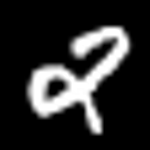

Row num : 104 // Num : 2 Hypothesis : 4


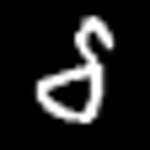

Row num : 125 // Num : 5 Hypothesis : 6


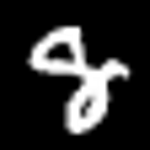

Row num : 131 // Num : 8 Hypothesis : 9


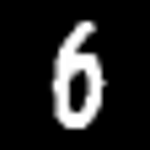

Row num : 133 // Num : 6 Hypothesis : 8


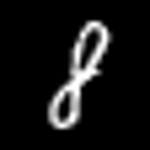

Row num : 135 // Num : 8 Hypothesis : 1


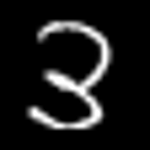

Row num : 139 // Num : 3 Hypothesis : 2


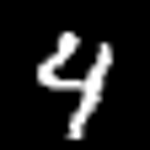

Row num : 163 // Num : 4 Hypothesis : 9


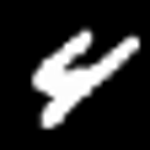

Row num : 170 // Num : 4 Hypothesis : 8


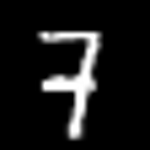

Row num : 173 // Num : 7 Hypothesis : 4


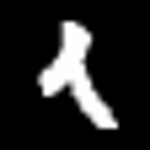

Row num : 191 // Num : 1 Hypothesis : 9


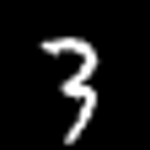

Row num : 192 // Num : 3 Hypothesis : 7


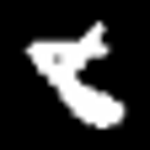

Row num : 197 // Num : 8 Hypothesis : 5


In [6]:
import PIL.Image
import IPython.display
import numpy as np

#make temp img list
imglist = [[0 for col in range(28)] for row in range(28)]

for num_row in range(len(x_train_data)):
  if num_row > 200: #Limit the output images. there are too many 
    break
  if accurcay[num_row][0] == False: #show me the wrong guesses I have to see for my self
    cnt = 0
    for row in range(28):
      for col in range(28):
        imglist[row][col] = x_train_data[num_row][cnt].item()
        cnt = cnt + 1
    img = PIL.Image.fromarray(np.uint8(imglist))#make array to size
    img  = img.resize([150,150])#set the size
    display(img)
    print("Row num : %d // Num : %.0f Hypothesis : %.0f"%(num_row,y_train_numbers_origianl[num_row][0],hypothesis_num[num_row]))


# END

Well I thought this would take a long time, but it only took 1 hour and 30 minutes.

Some of the wrong guessed numbers were due to bad handwriting, but most of them were difficult to read due to factors such as tilting or being too bold. 
 
Anyhow, it was fun and amazing to see the images(it was hard to display image). I feel like a real AI developer

## update
wow.... this ipynb was made 5 months ago, and now I see how much I improved.  
Right now, its  2023.07.05 1642i in my english academy looking at kids talking an enlgish test.  
ANYWAY! I have came back to update this ipynb to upload at kaggle.  
Looks like I need to see the test.csv and make a label for sample submisstion. 

In [7]:
import pandas as pd
import torch

try:
    test = pd.read_csv("test.csv")
except:
    test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
try:
    sub = pd.read_csv("sample_submission.csv")
except:
    sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
print(test.shape)
print(sub.shape)

test_tensor = torch.tensor(test.values).to(device).float()
hypothesis = torch.nn.functional.softmax(torch.matmul(test_tensor, W) + b, dim=1)

predictions = torch.argmax(hypothesis, dim=1)

# Assign predictions to the second column of the second row onwards in "sample_submission.csv"
sub.iloc[1:, 1] = predictions[1:].tolist()

# Save the updated "sample_submission.csv" file
try:
    sub.to_csv("/kaggle/working/sample_submission.csv", index=False)
except:
    print("no")
try:
    sub.to_csv("/kaggle/input/digit-recognizer/sample_submission.csv", index=False)
except:
    print("nono")

(28000, 784)
(28000, 2)
